In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import yfinance as yf

tesla_data = yf.download("TSLA", start="2010-01-01")
tesla_data = tesla_data.reset_index()
tesla_data.to_csv("tesla_data.csv", index=False)
tesla_data.head()


/tmp/ipython-input-271187872.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [6]:
import requests
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

In [8]:
tables = soup.find_all("table")

In [9]:
import pandas as pd
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [10]:
for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            if revenue != "":
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


In [11]:
tesla_revenue.head()

,Date,Revenue


In [12]:
gme_data = yf.download("GME", start="2010-01-01")
gme_data = gme_data.reset_index()
gme_data.to_csv("gme_data.csv", index=False)
gme_data.head()

/tmp/ipython-input-3730643718.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854644,3.863060,3.703151,3.714934,26702800
1,2010-01-05,3.959005,3.996036,3.854643,3.856326,21269600
2,2010-01-06,4.044851,4.056634,3.908507,3.948905,21471200
3,2010-01-07,3.443930,3.563441,3.268872,3.368184,164761200
4,2010-01-08,3.415316,3.573541,3.405216,3.474229,47872400


In [14]:
import requests
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

In [16]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            if revenue != "":
                gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

In [17]:
gme_revenue.head()

,Date,Revenue


In [18]:
gme_revenue.tail()

,Date,Revenue


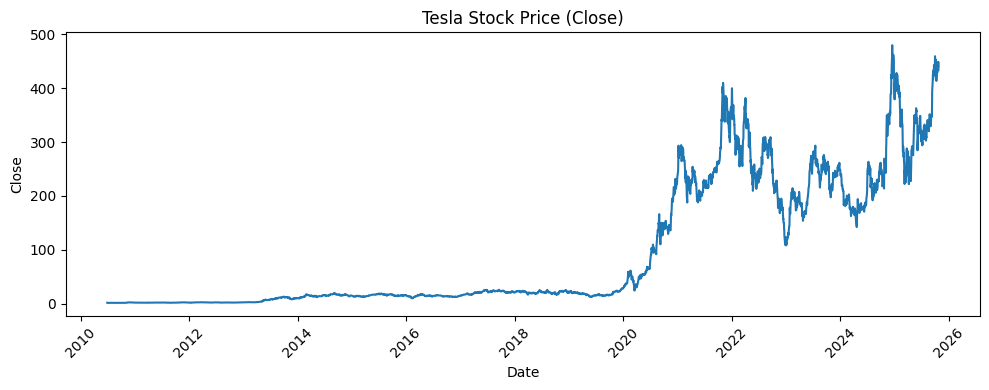

In [19]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(10,4))
    plt.plot(df["Date"], df["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price (Close)")

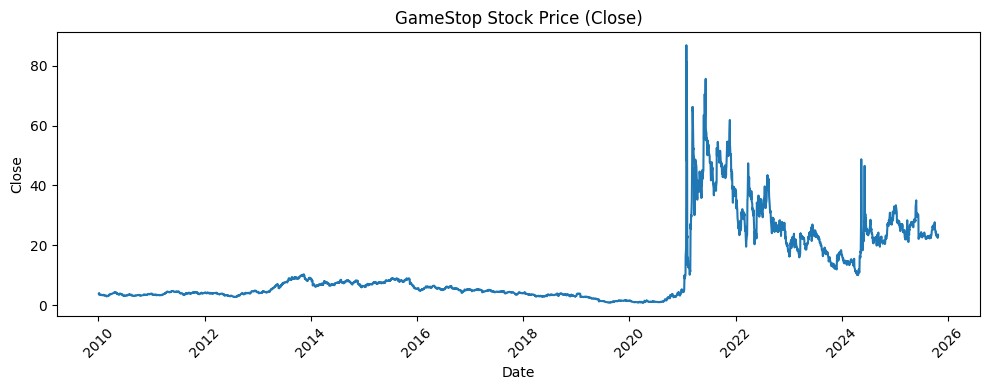

In [20]:
make_graph(gme_data, "GameStop Stock Price (Close)")

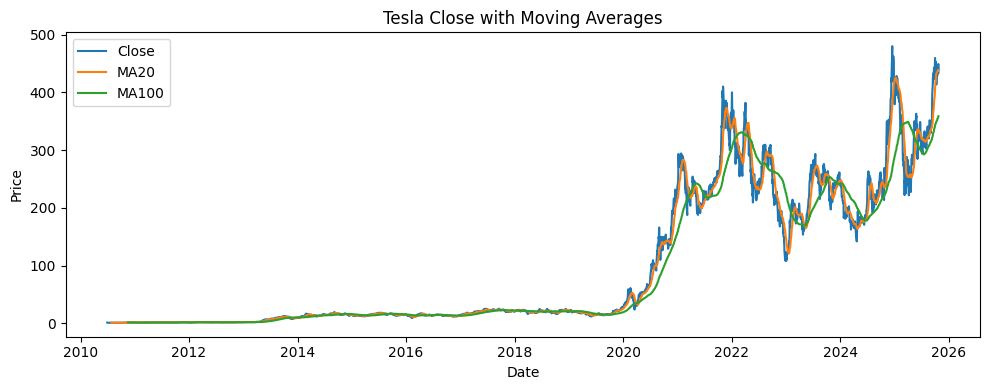

In [21]:
# Moving Average (trend vs price)

tesla_data["MA20"]  = tesla_data["Close"].rolling(20).mean()
tesla_data["MA100"] = tesla_data["Close"].rolling(100).mean()

plt.figure(figsize=(10,4))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Close")
plt.plot(tesla_data["Date"], tesla_data["MA20"],  label="MA20")
plt.plot(tesla_data["Date"], tesla_data["MA100"], label="MA100")
plt.title("Tesla Close with Moving Averages")
plt.legend(); plt.xlabel("Date"); plt.ylabel("Price"); plt.tight_layout(); plt.show()